In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
data["Gender"]=LE.fit_transform(data["Gender"])
data["Geography"]=LE.fit_transform(data["Geography"])
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data=data.drop(["CustomerId","Surname"],axis=1)

<Axes: >

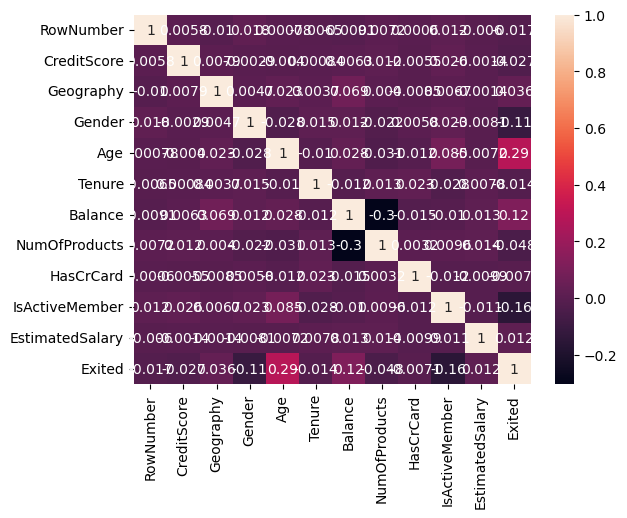

In [6]:
sns.heatmap(data.corr(),annot=True)

In [7]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [8]:
x

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,0,1,39,5,0.00,2,1,0,96270.64
9996,9997,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,9998,709,0,0,36,7,0.00,1,0,1,42085.58
9998,9999,772,1,1,42,3,75075.31,2,1,0,92888.52


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape
xtrain.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5504,5505,786,0,1,32,2,120452.40,2,0,0,79602.86
5307,5308,534,0,0,49,7,0.00,1,1,0,13566.48
1684,1685,613,0,0,24,7,140453.91,1,1,0,129001.30
2441,2442,735,2,1,29,10,0.00,2,1,1,95025.27
0,1,619,0,0,42,2,0.00,1,1,1,101348.88


In [11]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [12]:
ypred=lr.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
lr.score(xtest,ytest)

0.7845

In [14]:
from sklearn.svm import SVC
svm=SVC(kernel="linear")
svm.fit(xtrain,ytrain)

SVC(kernel='linear')

In [15]:
ypred=svm.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
import pickle as pkl

In [17]:
filename = "churn_model.sav"
pkl.dump(lr,open(filename,"bw"))

In [18]:
loaded_model = pkl.load(open(filename,"br"))
loaded_model

LogisticRegression()

In [19]:
new_data = np.array([1,2,5,8,7,9,6,5,5,10,5]).reshape(1,-1)
new_data

array([[ 1,  2,  5,  8,  7,  9,  6,  5,  5, 10,  5]])

In [20]:
loaded_model.predict(new_data)

C:\Users\lahar\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)